In [1]:
#@title Packages (only for first start)
!pip install tensorflow
%cd /content/drive/MyDrive/TensorFlow/models/research
!python -m pip install .


/content/drive/MyDrive/TensorFlow/models/research
Processing /content/drive/MyDrive/TensorFlow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1661378 sha256=4cbca5e1fdf750994c7f22f235925f8bf1767ea714a0f65ad60115e917c14985
  Stored in directory: /tmp/pip-ephem-wheel-cache-ujm0_oyp/wheels/8b/c1/f5/d0b2e6f976cfbb4a6fe40c59ae0a33a68b4fa09cfb88bbae2a
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstal

Loading model... 
Done! Took 17.67 seconds


Saving tree.jpg to tree (4).jpg
Running inference for tree.jpg... 


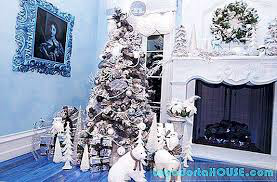

There is a Christmas tree in the image.


In [5]:
#@title Search Christmas tree on image { vertical-output: true, display-mode: "form" }
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import os
import warnings

from google.colab import files
from google.colab.patches import cv2_imshow
from io import BytesIO
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from PIL import Image


IMAGE_FORMAT = ('jpg','jpeg')
PATH_TO_SAVED_MODEL = '/content/drive/MyDrive/TensorFlow/workspace/training/exported-models/my-model/saved_model'
PATH_TO_MODEL_DIR = '/content/drive/MyDrive/TensorFlow/workspace/training/pre-trained-models/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
PATH_TO_LABELS = '/content/drive/MyDrive/TensorFlow/workspace/training/annotations/label_map.pbtxt'
warnings.filterwarnings('ignore')  

def load_image_into_numpy_array(path):
    return np.array(Image.open('/content/images/'+path))

def image_to_numpy_array(image):
    return np.array(Image.open(BytesIO(uploaded[image])))

#Load labelmap
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)
#Load model
print('Loading model... ')
start_time = time.time()
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Done! Took {elapsed_time:.2f} seconds')

uploaded = files.upload()

for image in uploaded:
    print(f'Running inference for {image}... ')

    image_np = image_to_numpy_array(image)
    cv2_imshow(image_np)
    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]
    detections = detect_fn(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    count = 0

    for score in detections['detection_scores']:
      if score is None or score > 0.4:
                    count += 1

    if count > 0:
      print('There is a Christmas tree in the image.')
    else:
      print('There is no Christmas tree in the image.')
